# Final Project: Methods for Population Growth Projections

## Logistic Growth

Below is the standard logistic growth model, defined as $P(t) = \frac{K N_0 e^{\gamma t}}{K + N_0 (e^{\gamma t} - 1)}$

In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

pop_change_df = pd.read_csv('data/pop_change.csv', index_col=0, header=0, skiprows=[], thousands=',')
# pop_change_df.apply(pd.to_numeric)

In [2]:
country_total = pop_change_df.as_matrix()[0]

In [3]:
times = np.arange(1910,2020,10)

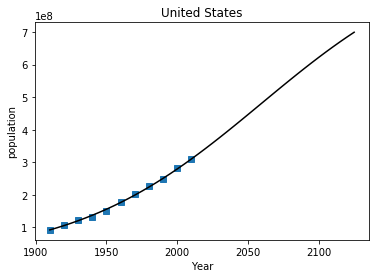

In [4]:
dN = (country_total[2:]-country_total[:-2])/(times[2:]-times[:-2])
P = dN / country_total[1:-1]
X = np.asarray([np.ones(9), country_total[1:-1]]).transpose()
Y = np.asarray(P)
alpha = np.linalg.lstsq(X,Y)[0]
gamma = alpha[0]
K = (-gamma) / alpha[1]
    
# compute the model estimate for the population development
t_estimate = np.arange(1910, 2130, 5)
N0=country_total[0]
t_model=t_estimate-1910
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
plt.figure()
plt.plot(times, country_total, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('United States')
plt.show()

## Logistic Growth Augmented with Migration

In [5]:
pop_change_df = pd.read_csv('data/mig.csv', index_col=0, header=0, skiprows=[], thousands=',')
pop_change_df.apply(pd.to_numeric)

,SMPOPNETMUSA
DATE,
1952,960424
1957,2112299
1962,1829274
1967,1549465
1972,2940497
1977,3926811
1982,3402260
1987,3428740
1992,4516808


## Modified Lotka-Volterra

In [184]:
gdp_data = pd.read_csv('data/gdp_3.csv', index_col=0, header=0, sep=';', skiprows=[], thousands=',')
gdp_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
World,1.366670e+17,1.421780e+17,1.526940e+17,1.643740e+17,1.800780e+17,1.961770e+17,2.128440e+17,2.264580e+17,2.443210e+17,2.690780e+17,...,5.785850e+18,6.346140e+18,6.016790e+18,6.595460e+18,7.328040e+18,7.489050e+18,7.699300e+17,7.909090e+18,7.478190e+18,7.587170e+18


In [398]:
pop_data = pd.read_csv('data/pop.csv', index_col=0, header=0, sep=';', skiprows=[], thousands=',')
pop_data.apply(pd.to_numeric)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,5.771500e+04,5.805500e+04,5.838600e+04,5.872600e+04,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
Afghanistan,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,1.015233e+07,1.037263e+07,1.060435e+07,1.085443e+07,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
Angola,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,6.309770e+06,6.414995e+06,6.523791e+06,6.642632e+06,...,2.099769e+07,2.175942e+07,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07
Albania,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,1.914573e+06,1.965598e+06,2.022272e+06,2.081695e+06,...,2.970017e+06,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06
Andorra,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,1.964700e+04,2.075800e+04,2.189000e+04,2.305800e+04,...,8.268300e+04,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04
Arab World,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,1.092306e+08,1.124069e+08,1.156802e+08,1.190165e+08,...,3.316538e+08,3.398255e+08,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08
United Arab Emirates,9.263400e+04,1.010780e+05,1.124720e+05,1.255660e+05,1.385290e+05,1.503620e+05,1.604810e+05,1.702830e+05,1.831940e+05,2.038200e+05,...,6.044067e+06,6.894278e+06,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06
Argentina,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,2.260875e+07,2.293220e+07,2.326128e+07,2.360599e+07,...,3.997022e+07,4.038239e+07,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07
Armenia,1.874120e+06,1.941491e+06,2.009526e+06,2.077575e+06,2.144998e+06,2.211316e+06,2.276031e+06,2.339124e+06,2.401140e+06,2.462925e+06,...,2.933056e+06,2.908220e+06,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06


In [423]:
gdp_real = gdp_data.as_matrix()[0] / 10**5 # Fix for weird data input issue
pop_real = pop_data.as_matrix()[257]

a1 = 0.003
a2 = -55/(10**18)
a3k1 = 5.2
b1 = 0.031
b2 = -2/(10**28)

print(a1, a2, a3k1, b1, b2)

def dpdt(x, t):
    return (a1*x[0] + a3k1*x[1] + a2*x[0]*x[1])
def dgdt(x, t):
    return b1*x[1] + b2*x[0]*x[1]
def dxdt(x, t):
    return np.array([dpdt(x, t),  dgdt(x, t)])

0.003 -5.5e-17 5.2 0.031 -2e-28


In [424]:
x0 = [1.15e9, 0.21e12]
t = np.arange(1850, 2150, 1)
res = np.asarray(integrate.odeint(dxdt, x0, t))
print(res)

[[  1.15000000e+09   2.10000000e+11]
 [  1.11190590e+12   2.16611956e+11]
 [  2.26095798e+12   2.23432092e+11]
 [  3.44952108e+12   2.30466964e+11]
 [  4.67884826e+12   2.37723333e+11]
 [  5.95023200e+12   2.45208172e+11]
 [  7.26500542e+12   2.52928675e+11]
 [  8.62454360e+12   2.60892262e+11]
 [  1.00302649e+13   2.69106586e+11]
 [  1.14836321e+13   2.77579543e+11]
 [  1.29861541e+13   2.86319275e+11]
 [  1.45393873e+13   2.95334181e+11]
 [  1.61449369e+13   3.04632927e+11]
 [  1.78044588e+13   3.14224448e+11]
 [  1.95196606e+13   3.24117963e+11]
 [  2.12923039e+13   3.34322980e+11]
 [  2.31242054e+13   3.44849308e+11]
 [  2.50172391e+13   3.55707062e+11]
 [  2.69733377e+13   3.66906678e+11]
 [  2.89944947e+13   3.78458920e+11]
 [  3.10827664e+13   3.90374890e+11]
 [  3.32402734e+13   4.02666040e+11]
 [  3.54692030e+13   4.15344183e+11]
 [  3.77718113e+13   4.28421504e+11]
 [  4.01504251e+13   4.41910571e+11]
 [  4.26074444e+13   4.55824348e+11]
 [  4.51453445e+13   4.70176207e+11]
 

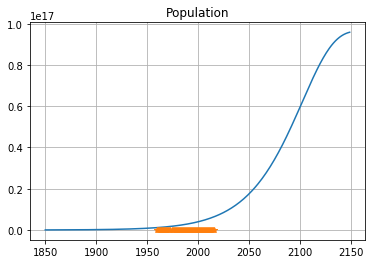

In [432]:
plt.figure()
plt.title("Population")
plt.grid()
plt.plot(t, res.T[0])
plt.plot(np.arange(1960, 2017, 1), pop_real, '*')
plt.show()

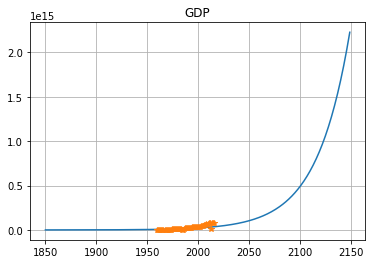

In [428]:
plt.figure()
plt.grid()
plt.title("GDP")
plt.plot(t, res.T[1])
plt.plot(np.arange(1960, 2017, 1), gdp_real, '*')
plt.plot()
plt.show()

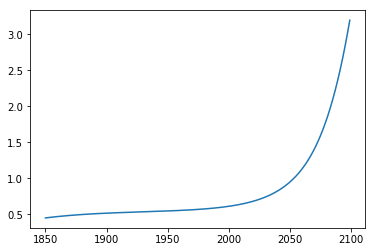

In [132]:
plt.figure()
plt.plot(t, res.T[1]/res.T[0])
plt.show()